### Trying Theil-Sen

In [1]:
file='/home/denis/pcloud/PB_carlos/SQL/drought_consultas_br_gpp_muni.csv'

In [2]:
import pandas as pd

In [3]:
gpp = pd.read_csv(file).pivot_table(index="acquisition",
                   columns="geocodig_m",
                   values="mean")

In [4]:
gpp.head()

geocodig_m,2100055,2100105,2100154,2100204,2100303,2100402,2100436,2100477,2100501,2100550,...,2933109,2933158,2933174,2933208,2933257,2933307,2933406,2933455,2933505,2933604
acquisition,,,,,,,,,,,,,,,,,,,,,
2002-07-04,623.619832,712.007343,659.526469,628.322112,715.647473,676.897400,731.059168,687.427156,153.676466,604.551091,...,437.252955,256.538398,476.211679,473.362426,420.565293,337.572629,465.152353,137.226114,579.634938,141.556499
2002-07-12,579.595267,729.132844,606.340896,611.580198,752.098401,700.182916,742.318596,643.244144,152.318737,607.382440,...,500.007092,267.898506,427.837956,443.102071,330.225713,336.551118,497.273529,132.248317,526.964260,133.475723
2002-07-20,579.869725,639.371829,555.031995,515.031683,684.469738,622.751161,653.302341,620.006178,136.351363,557.612599,...,388.632388,246.532586,376.420438,466.202663,341.544826,339.123053,379.871765,129.278054,343.902991,133.377567
2002-07-28,535.971155,569.187583,298.303083,343.808581,596.861548,516.162024,508.422627,492.747619,94.947945,249.924613,...,127.277778,215.777293,376.254015,445.707101,440.945806,310.367232,486.704118,87.941964,546.141867,93.531177
2002-08-05,540.475777,636.289720,510.112275,580.946095,719.769290,569.366295,611.176853,534.068855,101.854093,522.397817,...,328.361702,221.806351,454.816058,501.599112,428.796195,306.276176,451.086471,113.601635,611.279358,128.981437


In [17]:
from scipy import stats
import pylab as plt
import numpy as np

In [37]:
y = gpp[2933307]
res = theilslopes(y)
lsq_res = stats.linregress(x, y)
x = np.arange(len(y))

In [38]:
stats.theilslopes(y, alpha=0.85)

(-0.11327273102764579,
 414.53906301630127,
 -0.14553193371841783,
 -0.080983975494384158)

In [39]:
stats.linregress(x,y)

LinregressResult(slope=-0.095303739554821659, intercept=426.91170672759051, rvalue=-0.15007848762544601, pvalue=9.073603732707308e-05, stderr=0.024201212005751704)

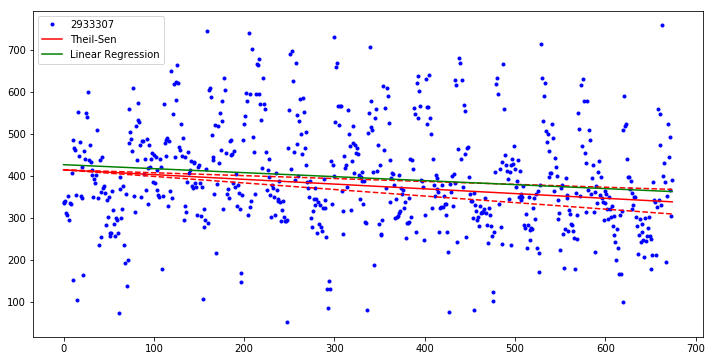

In [40]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.plot(x, y, 'b.')
ax.plot(x, res[1] + res[0] * x, 'r-', label='Theil-Sen')
ax.plot(x, res[1] + res[2] * x, 'r--')
ax.plot(x, res[1] + res[3] * x, 'r--')
ax.plot(x, lsq_res[1] + lsq_res[0] * x, 'g-', label='Linear Regression')
plt.legend()
plt.show()